In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import math

In [5]:
data = pd.read_csv("./Movie_Clean.csv")

Top 15 Languages

In [ ]:
languages = pd.DataFrame(data['original_language'].value_counts())
languages['language'] = languages.index
languages.columns = ['# of films', 'language']

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='language', y='# of films', data=languages.iloc[0:15])
plt.title('15 Most Popular Languages in Films')
plt.show()

Top 15 Most Popular Languages in Films
1. English (en)
2. French (fr)
3. Italian (it)
4. Japanese (ja)
5. German (de)
6. Spanish (es)
7. Russian (ru)
8. Hindi (hi)
9. Korean (ko)
10. Chinese (zh)
11. Swedish (sv)
12. Portuguese (pt)
13. Chinese - PRC (cn)
14. Finnish (fi)
15. Dutch (nl)

Genre Pie Chart

In [ ]:
genre_dict = {}
for item in data['genres']:
    item = ast.literal_eval(item)
    for n in item:
        if n in genre_dict.keys():
           genre_dict[n] += 1
        else: 
           genre_dict[n] = 1

In [ ]:
genre_count = 0
labels = []
values = []
for key, value in genre_dict.items():
    genre_count += value
    labels.append(key)
    values.append(value)
print(genre_count)

Total number of genres = 91282 (Only 45537 rows in dataset)

In [ ]:
genre_dict2 = genre_dict
labels = []
values = []
for key, value in genre_dict.items():
    labels.append(key + ': ' + str(value))
    values.append(value)

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Movies by Genre')
plt.show()

Runtime Chart

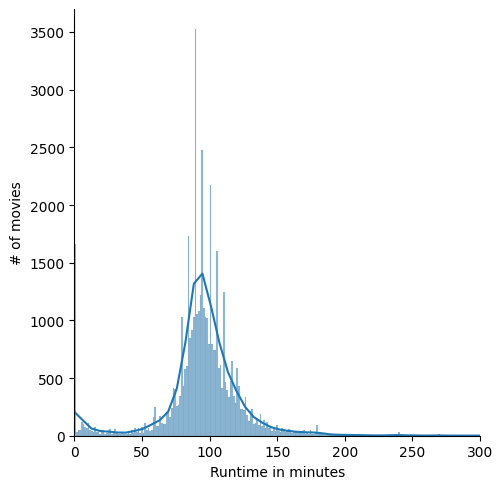

In [13]:
sns.displot(data=data['runtime'], kde=True)
plt.xlim([0, 300])
plt.xlabel('Runtime in minutes')
plt.ylabel('# of movies')
plt.show()

In [11]:
data['runtime'].describe()

count    45281.000000
mean        94.127846
std         38.395210
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

Vote Analysis

In [17]:
votes = pd.DataFrame({'vote_average': []})

In [25]:
for idx in data.index:
    if data.at[idx, 'vote_count'] >= 500:
        votes.loc[len(votes.index)] = data.at[idx, 'vote_average']

In [27]:
votes['vote_average'].describe()

count    3179.000000
mean        6.675149
std         0.774543
min         2.300000
25%         6.100000
50%         6.700000
75%         7.300000
max         9.100000
Name: vote_average, dtype: float64

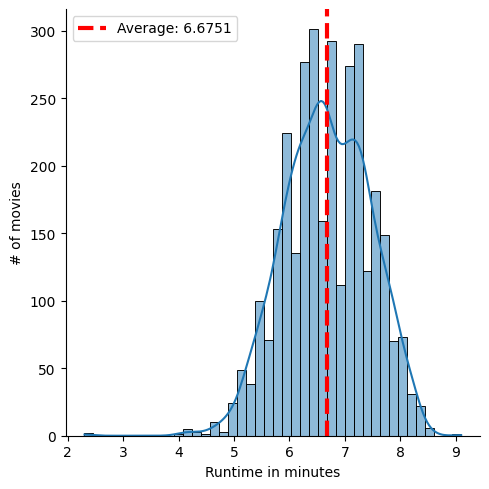

In [31]:
sns.displot(data=votes['vote_average'], kde=True)
avg = np.nanmean(votes['vote_average'])
plt.axvline(x=avg, color='red', linestyle='--', linewidth=3, label='Average: ' + str(round(avg, 4)))
plt.xlabel('Runtime in minutes')
plt.ylabel('# of movies')
plt.legend()
plt.show()

In [33]:
data[['title', 'vote_count']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count
15545,Inception,14075.0
12525,The Dark Knight,12269.0
14617,Avatar,12114.0
17890,The Avengers,12000.0
26649,Deadpool,11444.0
22950,Interstellar,11187.0
20128,Django Unchained,10297.0
23822,Guardians of the Galaxy,10014.0
2854,Fight Club,9678.0
18316,The Hunger Games,9634.0
